In [1]:
## Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data set

bakery = pd.read_csv(r'/Users/sachinsen/Library/CloudStorage/OneDrive-Personal/Mac/Data Analyst course/Upgrade - Data Analyst/Projects/Simplilearn/Practice/Data Set/Cupcake Vs muffine.csv')
bakery.shape

(20, 9)

In [4]:
bakery.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


<AxesSubplot:xlabel='Flour', ylabel='Sugar'>

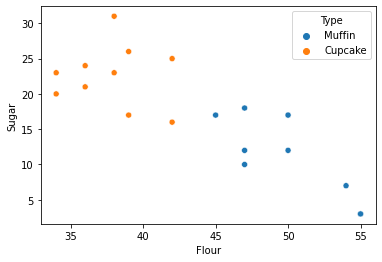

In [8]:
sns.scatterplot(data=bakery , x='Flour', y='Sugar', hue = 'Type')

In [9]:
bakery.isnull().sum()

Type             0
Flour            0
Milk             0
Sugar            0
Butter           0
Egg              0
Baking Powder    0
Vanilla          0
Salt             0
dtype: int64

In [10]:
## Preprocesing of data
Type_label = np.where(bakery['Type']=='Muffin',0,1)
Type_label


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
bakery_features = bakery.columns.values[1:].tolist()
bakery_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [21]:
ingredients = bakery[['Flour','Sugar']].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]])

In [22]:
## Import model

from sklearn import svm

In [25]:
## fit_model

model = svm.SVC(kernel='linear')

model.fit(ingredients,Type_label)

SVC(kernel='linear')

In [32]:
## get the seperating hyperplane

w= model.coef_[0]
a= -w[0]/w[1]
xx= np.linspace(30,60)
yy= a*xx - (model.intercept_[0]/w[1])
yy

array([ 1.15779472e+16,  1.10528750e+16,  1.05278028e+16,  1.00027306e+16,
        9.47765844e+15,  8.95258624e+15,  8.42751405e+15,  7.90244185e+15,
        7.37736965e+15,  6.85229746e+15,  6.32722526e+15,  5.80215306e+15,
        5.27708087e+15,  4.75200867e+15,  4.22693647e+15,  3.70186428e+15,
        3.17679208e+15,  2.65171988e+15,  2.12664769e+15,  1.60157549e+15,
        1.07650329e+15,  5.51431096e+14,  2.63588995e+13, -4.98713297e+14,
       -1.02378549e+15, -1.54885769e+15, -2.07392989e+15, -2.59900208e+15,
       -3.12407428e+15, -3.64914648e+15, -4.17421867e+15, -4.69929087e+15,
       -5.22436307e+15, -5.74943526e+15, -6.27450746e+15, -6.79957966e+15,
       -7.32465185e+15, -7.84972405e+15, -8.37479625e+15, -8.89986844e+15,
       -9.42494064e+15, -9.95001284e+15, -1.04750850e+16, -1.10001572e+16,
       -1.15252294e+16, -1.20503016e+16, -1.25753738e+16, -1.31004460e+16,
       -1.36255182e+16, -1.41505904e+16])

In [39]:
## plot the seperate parrallelto the seperating hyperplane that pass through the support vector

b= model.support_vectors_[0]
yy_down = a*xx + (b[1]) - a*b[0]
b = model.support_vectors_[1]
yy_up = a*xx + (b[1]) - a*b[0]
yy_up

array([ 1.02914151e+16,  9.76634286e+15,  9.24127066e+15,  8.71619846e+15,
        8.19112627e+15,  7.66605407e+15,  7.14098187e+15,  6.61590968e+15,
        6.09083748e+15,  5.56576528e+15,  5.04069309e+15,  4.51562089e+15,
        3.99054869e+15,  3.46547650e+15,  2.94040430e+15,  2.41533210e+15,
        1.89025991e+15,  1.36518771e+15,  8.40115515e+14,  3.15043318e+14,
       -2.10028879e+14, -7.35101075e+14, -1.26017327e+15, -1.78524547e+15,
       -2.31031767e+15, -2.83538986e+15, -3.36046206e+15, -3.88553426e+15,
       -4.41060645e+15, -4.93567865e+15, -5.46075085e+15, -5.98582304e+15,
       -6.51089524e+15, -7.03596743e+15, -7.56103963e+15, -8.08611183e+15,
       -8.61118402e+15, -9.13625622e+15, -9.66132842e+15, -1.01864006e+16,
       -1.07114728e+16, -1.12365450e+16, -1.17616172e+16, -1.22866894e+16,
       -1.28117616e+16, -1.33368338e+16, -1.38619060e+16, -1.43869782e+16,
       -1.49120504e+16, -1.54371226e+16])

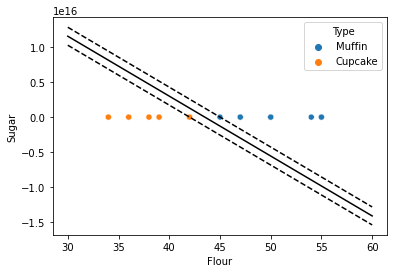

In [44]:
sns.scatterplot(data=bakery , x='Flour', y='Sugar', hue = 'Type')
plt.plot(xx,yy, color ='black')
plt.plot(xx, yy_down , 'k--')
plt.plot(xx, yy_up , 'k--')


In [63]:
## create a function 

def muffin_or_cupcake(flour,sugar):
    if (model.predict([[flour,sugar]]))==0:
        print('receipy is of muffin')
    else:
        print('receipy is of cupcake')

print(muffin_or_cupcake(40,20))   

receipy is of cupcake
None


In [53]:
print(muffin_or_cupcake(50,30))

receipy is of muffin
None


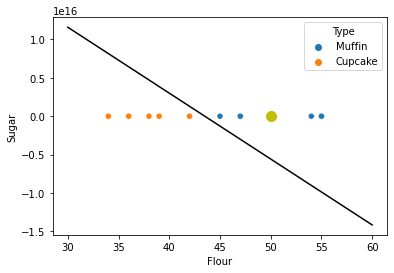

In [62]:
sns.scatterplot(data=bakery , x='Flour', y='Sugar', hue = 'Type')
plt.plot(xx,yy, color ='black')
plt.plot(50,30, 'yo', markersize = '10')